<a href="https://colab.research.google.com/github/ericbanzuzi/Thesis-DL-LC/blob/main/notebooks/ViViT_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from pathlib import Path

drive.mount('/content/drive', force_remount=True)
base = Path('/content/drive/MyDrive/thesis')  # working directory 

Mounted at /content/drive


Get the git repo to colab through a zip file to get faster performance

In [2]:
zip_path = base/'Thesis-DL-LC-main.zip'
!cp '{zip_path}' .
!unzip -q Thesis-DL-LC-main.zip
!rm Thesis-DL-LC-main.zip

In [3]:
%cd '/content/Thesis-DL-LC-main'

/content/Thesis-DL-LC-main


In [4]:
# imports
!pip install av  # needed for video reading using pytorchvision
import torch
import numpy as np
import matplotlib.pyplot as plt
from models.models import ViViT
from models.helper_functions import VideoFolderCustom, train, find_classes, eval_model, plot_training_path
from torchvision import transforms as t
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, RocCurveDisplay
import torch.nn as nn
from torch.utils.data import DataLoader

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 150
sns.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 12.0 MB/s eta 0:00:00


In [5]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
# setup transformer for the clips
transforms = [t.Resize((112,112), antialias=None)]
transformer = t.Compose(transforms)

# **Recognition**

These experiments are for the lane change recognition tasks. Here we look at how the modell performs and how the size of the region of interest affects the performances. All the models are evaluated by their accuracy, precision, recall and ROC curves.

The training set up is the following:
- Train set size: 5100 
- Test set size: 299
- Adam optimizer with a learning rate 1e-3
- Epochs: 40
- Batch size: 16

## **ROI 2:**

In [ ]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 2'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True, augmented=True)

test_dir = './datasets/test/Recognition/ROI 2'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

print('Training data:', len(train_data))
print('Test data:', len(test_data))

Training data: 5100
Test data: 299


In [ ]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'ViViT_ROI2_recognition')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = ViViT(num_heads=8, num_transformer_layers=8, 
              num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.332, loss=1.2]


Epoch: 1 | train_loss: 1.2003 | train_acc: 0.3319 | test_loss: 1.1077 | test_acc: 0.3089


Epoch [2/40]: 100%|██████████| 319/319 [05:12<00:00,  1.02it/s, acc=0.337, loss=1.11]


Epoch: 2 | train_loss: 1.1101 | train_acc: 0.3371 | test_loss: 1.1171 | test_acc: 0.3125


Epoch [3/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.36, loss=1.1]


Epoch: 3 | train_loss: 1.0974 | train_acc: 0.3598 | test_loss: 1.0795 | test_acc: 0.3783


Epoch [4/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.399, loss=1.08]


Epoch: 4 | train_loss: 1.0785 | train_acc: 0.3992 | test_loss: 1.0764 | test_acc: 0.3717


Epoch [5/40]: 100%|██████████| 319/319 [05:14<00:00,  1.02it/s, acc=0.424, loss=1.06]


Epoch: 5 | train_loss: 1.0606 | train_acc: 0.4242 | test_loss: 1.0613 | test_acc: 0.4124


Epoch [6/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.447, loss=1.03]


Epoch: 6 | train_loss: 1.0315 | train_acc: 0.4466 | test_loss: 1.0476 | test_acc: 0.4581


Epoch [7/40]: 100%|██████████| 319/319 [05:20<00:00,  1.00s/it, acc=0.464, loss=1.02]


Epoch: 7 | train_loss: 1.0179 | train_acc: 0.4637 | test_loss: 1.1037 | test_acc: 0.3944


Epoch [8/40]: 100%|██████████| 319/319 [05:28<00:00,  1.03s/it, acc=0.471, loss=1.02]


Epoch: 8 | train_loss: 1.0154 | train_acc: 0.4707 | test_loss: 1.0279 | test_acc: 0.4432


Epoch [9/40]: 100%|██████████| 319/319 [05:28<00:00,  1.03s/it, acc=0.487, loss=0.998]


Epoch: 9 | train_loss: 0.9979 | train_acc: 0.4870 | test_loss: 1.0301 | test_acc: 0.4797


Epoch [10/40]: 100%|██████████| 319/319 [05:30<00:00,  1.04s/it, acc=0.493, loss=0.985]


Epoch: 10 | train_loss: 0.9845 | train_acc: 0.4934 | test_loss: 1.0227 | test_acc: 0.4785


Epoch [11/40]: 100%|██████████| 319/319 [05:30<00:00,  1.03s/it, acc=0.535, loss=0.951]


Epoch: 11 | train_loss: 0.9510 | train_acc: 0.5351 | test_loss: 0.9920 | test_acc: 0.5090


Epoch [12/40]: 100%|██████████| 319/319 [05:29<00:00,  1.03s/it, acc=0.55, loss=0.947]


Epoch: 12 | train_loss: 0.9474 | train_acc: 0.5502 | test_loss: 1.0272 | test_acc: 0.4797


Epoch [13/40]: 100%|██████████| 319/319 [05:28<00:00,  1.03s/it, acc=0.534, loss=0.953]


Epoch: 13 | train_loss: 0.9526 | train_acc: 0.5339 | test_loss: 1.0649 | test_acc: 0.4629


Epoch [14/40]: 100%|██████████| 319/319 [05:29<00:00,  1.03s/it, acc=0.539, loss=0.941]


Epoch: 14 | train_loss: 0.9409 | train_acc: 0.5388 | test_loss: 1.0322 | test_acc: 0.5138


Epoch [15/40]: 100%|██████████| 319/319 [05:29<00:00,  1.03s/it, acc=0.559, loss=0.92]


Epoch: 15 | train_loss: 0.9197 | train_acc: 0.5587 | test_loss: 0.9932 | test_acc: 0.5141


Epoch [16/40]: 100%|██████████| 319/319 [05:28<00:00,  1.03s/it, acc=0.58, loss=0.897]


Epoch: 16 | train_loss: 0.8972 | train_acc: 0.5798 | test_loss: 0.9662 | test_acc: 0.5158


Epoch [17/40]: 100%|██████████| 319/319 [05:29<00:00,  1.03s/it, acc=0.576, loss=0.901]


Epoch: 17 | train_loss: 0.9014 | train_acc: 0.5762 | test_loss: 0.9521 | test_acc: 0.5452


Epoch [18/40]: 100%|██████████| 319/319 [05:29<00:00,  1.03s/it, acc=0.592, loss=0.879]


Epoch: 18 | train_loss: 0.8794 | train_acc: 0.5923 | test_loss: 0.9828 | test_acc: 0.5649


Epoch [19/40]: 100%|██████████| 319/319 [05:29<00:00,  1.03s/it, acc=0.601, loss=0.86]


Epoch: 19 | train_loss: 0.8604 | train_acc: 0.6008 | test_loss: 0.9965 | test_acc: 0.5661


Epoch [20/40]: 100%|██████████| 319/319 [05:27<00:00,  1.03s/it, acc=0.612, loss=0.846]


Epoch: 20 | train_loss: 0.8457 | train_acc: 0.6123 | test_loss: 1.0059 | test_acc: 0.5305


Epoch [21/40]: 100%|██████████| 319/319 [05:29<00:00,  1.03s/it, acc=0.616, loss=0.849]


Epoch: 21 | train_loss: 0.8493 | train_acc: 0.6157 | test_loss: 1.0080 | test_acc: 0.5254


Epoch [22/40]: 100%|██████████| 319/319 [05:30<00:00,  1.04s/it, acc=0.639, loss=0.819]


Epoch: 22 | train_loss: 0.8187 | train_acc: 0.6393 | test_loss: 1.0733 | test_acc: 0.5649


Epoch [23/40]: 100%|██████████| 319/319 [05:30<00:00,  1.04s/it, acc=0.647, loss=0.797]


Epoch: 23 | train_loss: 0.7973 | train_acc: 0.6470 | test_loss: 0.9922 | test_acc: 0.5487


Epoch [24/40]: 100%|██████████| 319/319 [05:29<00:00,  1.03s/it, acc=0.632, loss=0.822]


Epoch: 24 | train_loss: 0.8219 | train_acc: 0.6315 | test_loss: 1.0097 | test_acc: 0.5302


Epoch [25/40]: 100%|██████████| 319/319 [05:29<00:00,  1.03s/it, acc=0.626, loss=0.825]


Epoch: 25 | train_loss: 0.8245 | train_acc: 0.6262 | test_loss: 1.0236 | test_acc: 0.5305


Epoch [26/40]: 100%|██████████| 319/319 [05:28<00:00,  1.03s/it, acc=0.64, loss=0.805]


Epoch: 26 | train_loss: 0.8051 | train_acc: 0.6400 | test_loss: 1.0910 | test_acc: 0.5505


Epoch [27/40]: 100%|██████████| 319/319 [05:30<00:00,  1.03s/it, acc=0.649, loss=0.794]


Epoch: 27 | train_loss: 0.7941 | train_acc: 0.6493 | test_loss: 1.0265 | test_acc: 0.5323


Epoch [28/40]: 100%|██████████| 319/319 [05:29<00:00,  1.03s/it, acc=0.607, loss=0.865]


Epoch: 28 | train_loss: 0.8646 | train_acc: 0.6074 | test_loss: 1.0642 | test_acc: 0.4797


Epoch [29/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.596, loss=0.882]


Epoch: 29 | train_loss: 0.8818 | train_acc: 0.5959 | test_loss: 0.9865 | test_acc: 0.5138


Epoch [30/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.578, loss=0.906]


Epoch: 30 | train_loss: 0.9061 | train_acc: 0.5783 | test_loss: 1.0093 | test_acc: 0.5191


Epoch [31/40]: 100%|██████████| 319/319 [05:14<00:00,  1.02it/s, acc=0.594, loss=0.883]


Epoch: 31 | train_loss: 0.8826 | train_acc: 0.5944 | test_loss: 1.0376 | test_acc: 0.4862


Epoch [32/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.595, loss=0.879]


Epoch: 32 | train_loss: 0.8787 | train_acc: 0.5953 | test_loss: 0.9924 | test_acc: 0.5009


Epoch [33/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.584, loss=0.9]


Epoch: 33 | train_loss: 0.9001 | train_acc: 0.5842 | test_loss: 1.0160 | test_acc: 0.4877


Epoch [34/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.565, loss=0.926]


Epoch: 34 | train_loss: 0.9260 | train_acc: 0.5649 | test_loss: 1.1199 | test_acc: 0.4626


Epoch [35/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.596, loss=0.875]


Epoch: 35 | train_loss: 0.8747 | train_acc: 0.5962 | test_loss: 1.1737 | test_acc: 0.4982


Epoch [36/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.591, loss=0.886]


Epoch: 36 | train_loss: 0.8858 | train_acc: 0.5914 | test_loss: 0.9993 | test_acc: 0.5257


Epoch [37/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.584, loss=0.884]


Epoch: 37 | train_loss: 0.8837 | train_acc: 0.5838 | test_loss: 1.0869 | test_acc: 0.4668


Epoch [38/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.582, loss=0.893]


Epoch: 38 | train_loss: 0.8931 | train_acc: 0.5816 | test_loss: 1.0752 | test_acc: 0.4868


Epoch [39/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.554, loss=0.94]


Epoch: 39 | train_loss: 0.9396 | train_acc: 0.5541 | test_loss: 1.0292 | test_acc: 0.4844


Epoch [40/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.532, loss=0.957]


Epoch: 40 | train_loss: 0.9566 | train_acc: 0.5320 | test_loss: 1.0484 | test_acc: 0.4420
Total training time: 13475.450 seconds


Originally the idea was to train 40 epochs, however, it is clear that the model could improve more, so the training was continued for 10 epochs. For the rest of the models and the visualization below, I will consider the model's performance for 50 epochs.

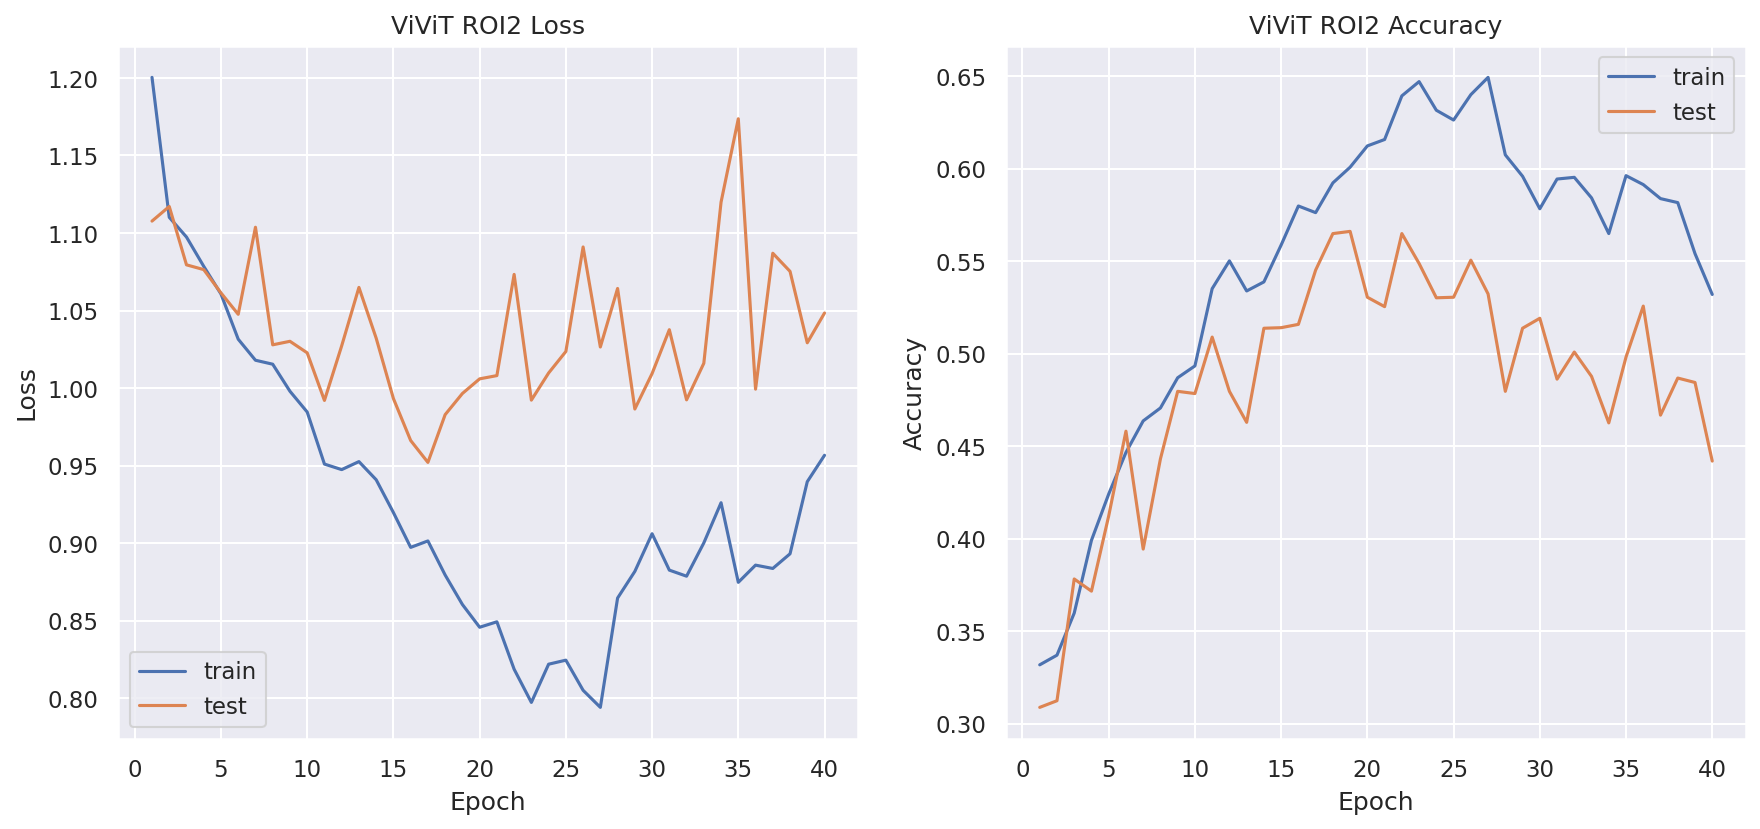

In [ ]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'ViViT ROI2')

In [ ]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = ViViT(num_heads=8, num_transformer_layers=8, 
              num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.5484949832775919
Precision: 0.5537664747198816
Recall: 0.547265221878225


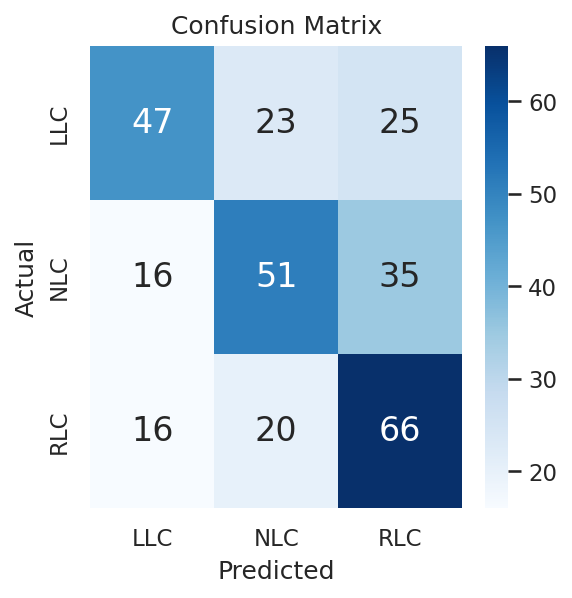

In [ ]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

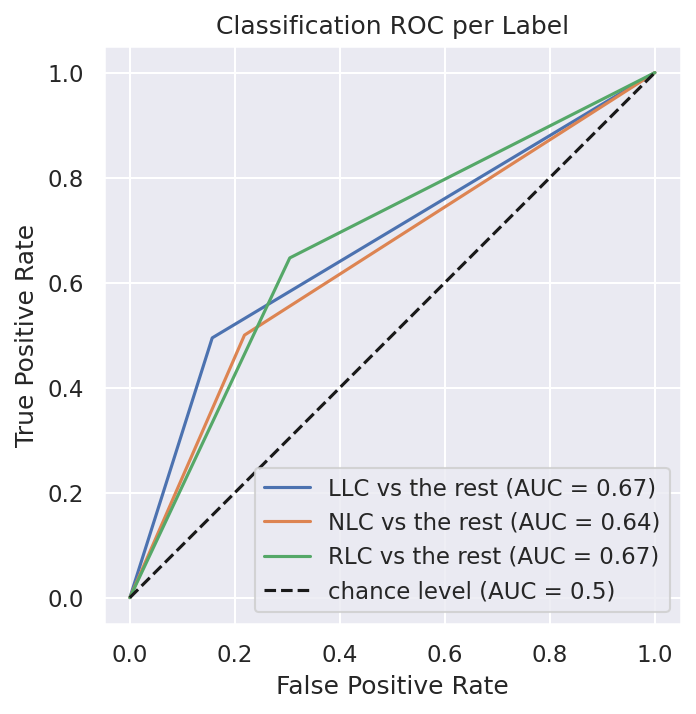

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

label_set = {'LLC': 0, 'NLC': 1, 'RLC': 2}

for label in label_set:
    RocCurveDisplay.from_predictions(
        (np.array(y_test) == label_set[label]).astype(int),
        (np.array(predictions) == label_set[label]).astype(int),
        name = f"{label} vs the rest",
        ax=ax)


plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.axis('square')
plt.title("Classification ROC per Label")
plt.show()

## **ROI 3:**

In [7]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 3'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True, augmented=True)

test_dir = './datasets/test/Recognition/ROI 3'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

In [9]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'ViViT_ROI3_recognition')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = ViViT(num_heads=8, num_transformer_layers=8, 
              num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.333, loss=1.21]


Epoch: 1 | train_loss: 1.2123 | train_acc: 0.3330 | test_loss: 1.1021 | test_acc: 0.3520


Epoch [2/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.343, loss=1.12]


Epoch: 2 | train_loss: 1.1195 | train_acc: 0.3431 | test_loss: 1.1044 | test_acc: 0.3092


Epoch [3/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.344, loss=1.11]


Epoch: 3 | train_loss: 1.1091 | train_acc: 0.3441 | test_loss: 1.0930 | test_acc: 0.3553


Epoch [4/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.386, loss=1.09]


Epoch: 4 | train_loss: 1.0856 | train_acc: 0.3860 | test_loss: 1.0752 | test_acc: 0.4321


Epoch [5/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.426, loss=1.05]


Epoch: 5 | train_loss: 1.0536 | train_acc: 0.4259 | test_loss: 1.0582 | test_acc: 0.3947


Epoch [6/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.473, loss=1.02]


Epoch: 6 | train_loss: 1.0183 | train_acc: 0.4733 | test_loss: 1.0173 | test_acc: 0.4844


Epoch [7/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.48, loss=1]


Epoch: 7 | train_loss: 1.0011 | train_acc: 0.4798 | test_loss: 1.0302 | test_acc: 0.5093


Epoch [8/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.514, loss=0.973]


Epoch: 8 | train_loss: 0.9727 | train_acc: 0.5144 | test_loss: 0.9915 | test_acc: 0.4800


Epoch [9/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.516, loss=0.974]


Epoch: 9 | train_loss: 0.9741 | train_acc: 0.5157 | test_loss: 1.0483 | test_acc: 0.4614


Epoch [10/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.53, loss=0.967]


Epoch: 10 | train_loss: 0.9667 | train_acc: 0.5301 | test_loss: 1.0054 | test_acc: 0.5111


Epoch [11/40]: 100%|██████████| 319/319 [05:17<00:00,  1.01it/s, acc=0.568, loss=0.914]


Epoch: 11 | train_loss: 0.9140 | train_acc: 0.5677 | test_loss: 1.0185 | test_acc: 0.5350


Epoch [12/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.557, loss=0.928]


Epoch: 12 | train_loss: 0.9279 | train_acc: 0.5569 | test_loss: 0.9944 | test_acc: 0.4614


Epoch [13/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.562, loss=0.917]


Epoch: 13 | train_loss: 0.9168 | train_acc: 0.5618 | test_loss: 1.0049 | test_acc: 0.5060


Epoch [14/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.581, loss=0.893]


Epoch: 14 | train_loss: 0.8930 | train_acc: 0.5810 | test_loss: 1.0490 | test_acc: 0.4701


Epoch [15/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.586, loss=0.89]


Epoch: 15 | train_loss: 0.8897 | train_acc: 0.5856 | test_loss: 1.0391 | test_acc: 0.4800


Epoch [16/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.588, loss=0.89]


Epoch: 16 | train_loss: 0.8899 | train_acc: 0.5883 | test_loss: 1.0281 | test_acc: 0.5203


Epoch [17/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.566, loss=0.905]


Epoch: 17 | train_loss: 0.9052 | train_acc: 0.5661 | test_loss: 1.0736 | test_acc: 0.4976


Epoch [18/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.562, loss=0.906]


Epoch: 18 | train_loss: 0.9061 | train_acc: 0.5620 | test_loss: 1.0582 | test_acc: 0.4764


Epoch [19/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.589, loss=0.883]


Epoch: 19 | train_loss: 0.8831 | train_acc: 0.5888 | test_loss: 1.0032 | test_acc: 0.5386


Epoch [20/40]: 100%|██████████| 319/319 [05:14<00:00,  1.02it/s, acc=0.591, loss=0.877]


Epoch: 20 | train_loss: 0.8772 | train_acc: 0.5913 | test_loss: 0.9855 | test_acc: 0.4943


Epoch [21/40]: 100%|██████████| 319/319 [05:14<00:00,  1.02it/s, acc=0.589, loss=0.895]


Epoch: 21 | train_loss: 0.8947 | train_acc: 0.5886 | test_loss: 0.9922 | test_acc: 0.4916


Epoch [22/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.587, loss=0.886]


Epoch: 22 | train_loss: 0.8863 | train_acc: 0.5869 | test_loss: 1.0161 | test_acc: 0.5338


Epoch [23/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.51, loss=0.994]


Epoch: 23 | train_loss: 0.9939 | train_acc: 0.5099 | test_loss: 1.3419 | test_acc: 0.3421


Epoch [24/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.483, loss=1.01]


Epoch: 24 | train_loss: 1.0076 | train_acc: 0.4829 | test_loss: 1.0504 | test_acc: 0.4566


Epoch [25/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.442, loss=1.05]


Epoch: 25 | train_loss: 1.0534 | train_acc: 0.4417 | test_loss: 1.0526 | test_acc: 0.4483


Epoch [26/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.471, loss=1.03]


Epoch: 26 | train_loss: 1.0251 | train_acc: 0.4707 | test_loss: 1.0660 | test_acc: 0.4187


Epoch [27/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.489, loss=1.01]


Epoch: 27 | train_loss: 1.0056 | train_acc: 0.4891 | test_loss: 1.0945 | test_acc: 0.4010


Epoch [28/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.49, loss=1]


Epoch: 28 | train_loss: 1.0003 | train_acc: 0.4899 | test_loss: 1.0658 | test_acc: 0.4258


Epoch [29/40]: 100%|██████████| 319/319 [05:13<00:00,  1.02it/s, acc=0.495, loss=0.998]


Epoch: 29 | train_loss: 0.9976 | train_acc: 0.4955 | test_loss: 1.0332 | test_acc: 0.4536


Epoch [30/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.503, loss=0.991]


Epoch: 30 | train_loss: 0.9909 | train_acc: 0.5030 | test_loss: 1.0346 | test_acc: 0.4892


Epoch [31/40]: 100%|██████████| 319/319 [05:17<00:00,  1.00it/s, acc=0.5, loss=0.989]


Epoch: 31 | train_loss: 0.9890 | train_acc: 0.5005 | test_loss: 1.0136 | test_acc: 0.4815


Epoch [32/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.49, loss=1.01]


Epoch: 32 | train_loss: 1.0068 | train_acc: 0.4902 | test_loss: 1.0626 | test_acc: 0.4617


Epoch [33/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.492, loss=1]


Epoch: 33 | train_loss: 1.0039 | train_acc: 0.4917 | test_loss: 1.0525 | test_acc: 0.4441


Epoch [34/40]: 100%|██████████| 319/319 [05:14<00:00,  1.01it/s, acc=0.484, loss=1.02]


Epoch: 34 | train_loss: 1.0163 | train_acc: 0.4842 | test_loss: 1.0553 | test_acc: 0.4782


Epoch [35/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.495, loss=1.01]


Epoch: 35 | train_loss: 1.0111 | train_acc: 0.4951 | test_loss: 1.0579 | test_acc: 0.4516


Epoch [36/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.502, loss=1.01]


Epoch: 36 | train_loss: 1.0052 | train_acc: 0.5020 | test_loss: 1.0603 | test_acc: 0.4991


Epoch [37/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.508, loss=0.997]


Epoch: 37 | train_loss: 0.9971 | train_acc: 0.5084 | test_loss: 1.0657 | test_acc: 0.4306


Epoch [38/40]: 100%|██████████| 319/319 [05:14<00:00,  1.02it/s, acc=0.517, loss=0.993]


Epoch: 38 | train_loss: 0.9932 | train_acc: 0.5171 | test_loss: 1.0770 | test_acc: 0.4157


Epoch [39/40]: 100%|██████████| 319/319 [05:15<00:00,  1.01it/s, acc=0.501, loss=1.01]


Epoch: 39 | train_loss: 1.0103 | train_acc: 0.5014 | test_loss: 1.0428 | test_acc: 0.4501


Epoch [40/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.492, loss=1.01]


Epoch: 40 | train_loss: 1.0110 | train_acc: 0.4924 | test_loss: 1.1945 | test_acc: 0.3825
Total training time: 13166.385 seconds


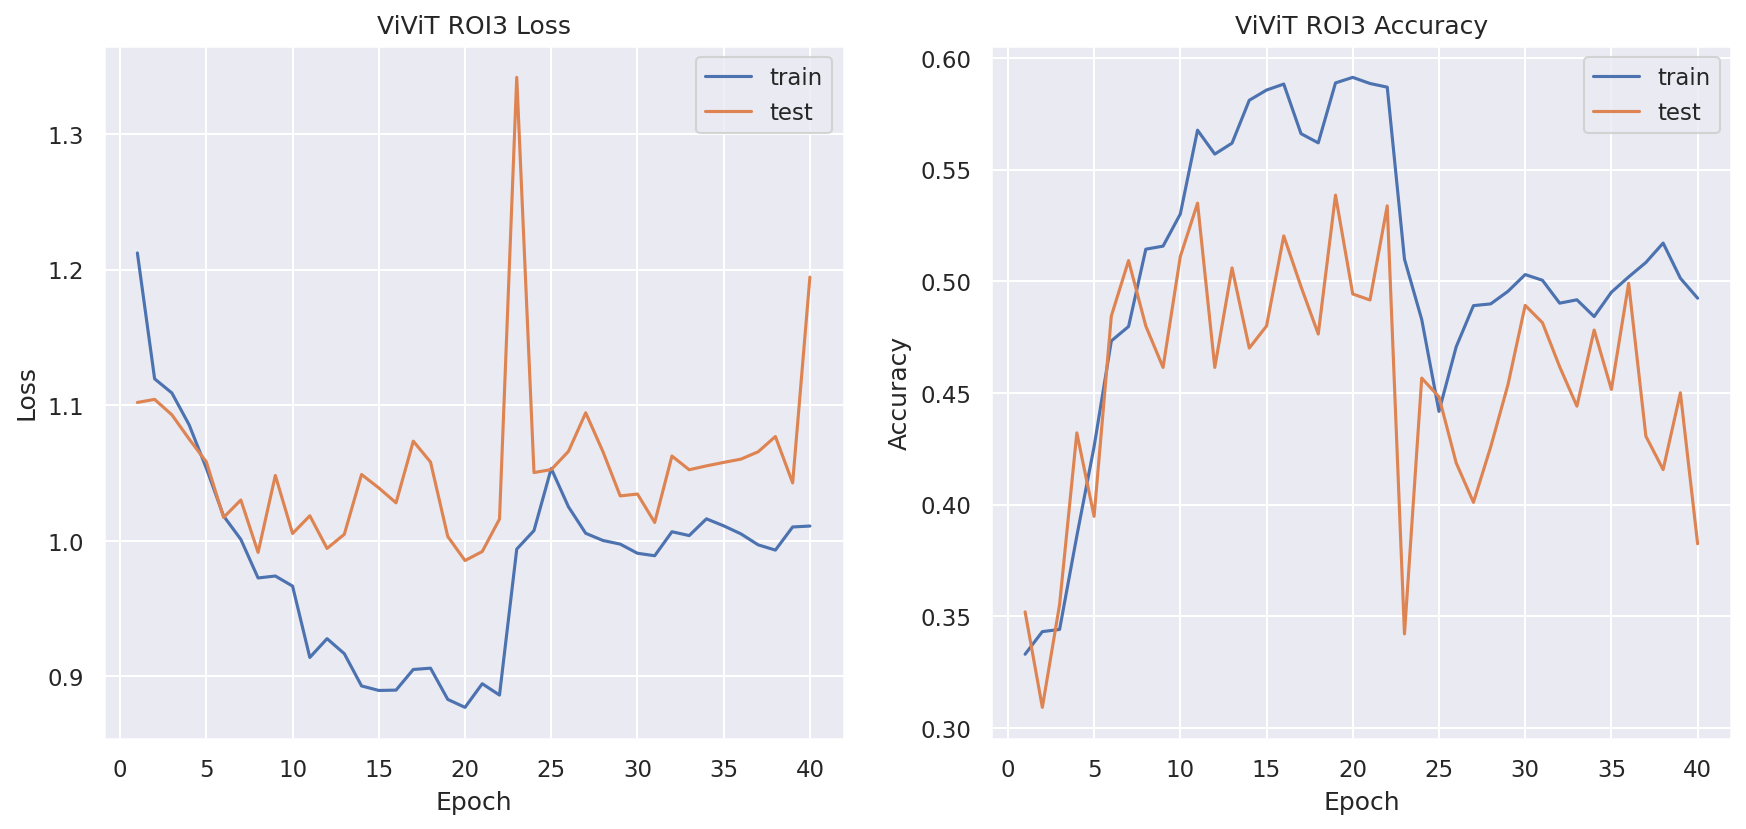

In [10]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'ViViT ROI3')

**Metrics:**

In [11]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = ViViT(num_heads=8, num_transformer_layers=8, 
              num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.5183946488294314
Precision: 0.5216389064586407
Recall: 0.5159270725834193


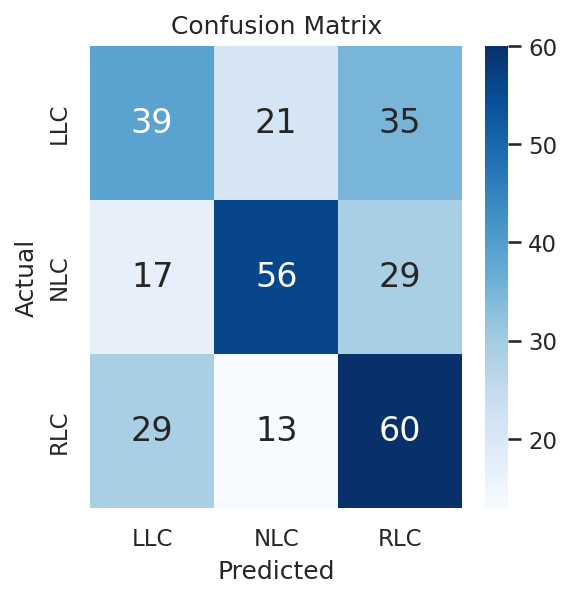

In [12]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

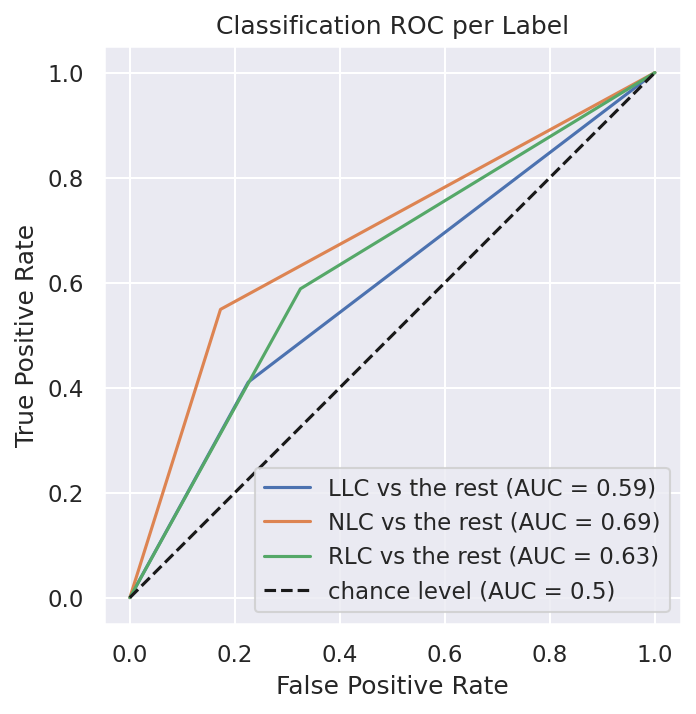

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))

label_set = {'LLC': 0, 'NLC': 1, 'RLC': 2}

for label in label_set:
    RocCurveDisplay.from_predictions(
        (np.array(y_test) == label_set[label]).astype(int),
        (np.array(predictions) == label_set[label]).astype(int),
        name = f"{label} vs the rest",
        ax=ax)


plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.axis('square')
plt.title("Classification ROC per Label")
plt.show()

## **ROI 4:**

In [14]:
# setup videofolder to download the data
train_dir = './datasets/train/Recognition/ROI 4'
train_data = VideoFolderCustom(targ_dir=train_dir, transform=transformer, permute=True, augmented=True)

test_dir = './datasets/test/Recognition/ROI 4'
test_data = VideoFolderCustom(targ_dir=test_dir, transform=transformer, permute=True)

In [15]:
# Setup batch size, epochs and storage path
BATCH_SIZE = 16
NUM_EPOCHS = 40
result_path = str(base/'ViViT_ROI4_recognition')

# Create DataLoader's
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                             batch_size=BATCH_SIZE, 
                             shuffle=False)

model = ViViT(num_heads=8, num_transformer_layers=8, 
              num_classes=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model 
results = train(model=model, 
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                device=device,
                result_path=result_path,
                loss_fn=loss_fn, 
                epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch [1/40]: 100%|██████████| 319/319 [05:18<00:00,  1.00it/s, acc=0.321, loss=1.21]


Epoch: 1 | train_loss: 1.2107 | train_acc: 0.3209 | test_loss: 1.1454 | test_acc: 0.4243


Epoch [2/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.331, loss=1.12]


Epoch: 2 | train_loss: 1.1224 | train_acc: 0.3312 | test_loss: 1.1040 | test_acc: 0.3406


Epoch [3/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.345, loss=1.1]


Epoch: 3 | train_loss: 1.1041 | train_acc: 0.3448 | test_loss: 1.1174 | test_acc: 0.3571


Epoch [4/40]: 100%|██████████| 319/319 [05:18<00:00,  1.00it/s, acc=0.36, loss=1.1]


Epoch: 4 | train_loss: 1.0969 | train_acc: 0.3600 | test_loss: 1.0790 | test_acc: 0.4118


Epoch [5/40]: 100%|██████████| 319/319 [05:18<00:00,  1.00it/s, acc=0.392, loss=1.08]


Epoch: 5 | train_loss: 1.0815 | train_acc: 0.3917 | test_loss: 1.0611 | test_acc: 0.4303


Epoch [6/40]: 100%|██████████| 319/319 [05:18<00:00,  1.00it/s, acc=0.379, loss=1.09]


Epoch: 6 | train_loss: 1.0868 | train_acc: 0.3793 | test_loss: 1.0622 | test_acc: 0.4187


Epoch [7/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.432, loss=1.05]


Epoch: 7 | train_loss: 1.0475 | train_acc: 0.4316 | test_loss: 1.0296 | test_acc: 0.4321


Epoch [8/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.448, loss=1.03]


Epoch: 8 | train_loss: 1.0309 | train_acc: 0.4482 | test_loss: 1.0059 | test_acc: 0.4650


Epoch [9/40]: 100%|██████████| 319/319 [05:20<00:00,  1.00s/it, acc=0.471, loss=1.01]


Epoch: 9 | train_loss: 1.0133 | train_acc: 0.4710 | test_loss: 1.0079 | test_acc: 0.4554


Epoch [10/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.467, loss=1.01]


Epoch: 10 | train_loss: 1.0104 | train_acc: 0.4671 | test_loss: 1.0656 | test_acc: 0.4279


Epoch [11/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.482, loss=1]


Epoch: 11 | train_loss: 1.0043 | train_acc: 0.4822 | test_loss: 0.9989 | test_acc: 0.4800


Epoch [12/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.491, loss=0.995]


Epoch: 12 | train_loss: 0.9949 | train_acc: 0.4911 | test_loss: 1.0196 | test_acc: 0.4354


Epoch [13/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.476, loss=1]


Epoch: 13 | train_loss: 1.0040 | train_acc: 0.4758 | test_loss: 1.0161 | test_acc: 0.4605


Epoch [14/40]: 100%|██████████| 319/319 [05:18<00:00,  1.00it/s, acc=0.433, loss=1.04]


Epoch: 14 | train_loss: 1.0406 | train_acc: 0.4329 | test_loss: 1.0529 | test_acc: 0.4608


Epoch [15/40]: 100%|██████████| 319/319 [05:18<00:00,  1.00it/s, acc=0.444, loss=1.04]


Epoch: 15 | train_loss: 1.0379 | train_acc: 0.4438 | test_loss: 1.0461 | test_acc: 0.4608


Epoch [16/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.45, loss=1.03]


Epoch: 16 | train_loss: 1.0250 | train_acc: 0.4500 | test_loss: 1.0148 | test_acc: 0.4740


Epoch [17/40]: 100%|██████████| 319/319 [05:19<00:00,  1.00s/it, acc=0.465, loss=1.01]


Epoch: 17 | train_loss: 1.0116 | train_acc: 0.4653 | test_loss: 1.0136 | test_acc: 0.4871


Epoch [18/40]: 100%|██████████| 319/319 [05:18<00:00,  1.00it/s, acc=0.47, loss=1.02]


Epoch: 18 | train_loss: 1.0160 | train_acc: 0.4704 | test_loss: 1.0802 | test_acc: 0.4264


Epoch [19/40]: 100%|██████████| 319/319 [05:18<00:00,  1.00it/s, acc=0.47, loss=1.01]


Epoch: 19 | train_loss: 1.0060 | train_acc: 0.4696 | test_loss: 1.0255 | test_acc: 0.4656


Epoch [20/40]: 100%|██████████| 319/319 [05:17<00:00,  1.00it/s, acc=0.483, loss=0.999]


Epoch: 20 | train_loss: 0.9994 | train_acc: 0.4827 | test_loss: 1.0158 | test_acc: 0.4381


Epoch [21/40]: 100%|██████████| 319/319 [05:17<00:00,  1.01it/s, acc=0.478, loss=0.99]


Epoch: 21 | train_loss: 0.9902 | train_acc: 0.4781 | test_loss: 0.9985 | test_acc: 0.4758


Epoch [22/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.484, loss=0.995]


Epoch: 22 | train_loss: 0.9946 | train_acc: 0.4842 | test_loss: 1.0392 | test_acc: 0.4273


Epoch [23/40]: 100%|██████████| 319/319 [05:17<00:00,  1.01it/s, acc=0.483, loss=0.998]


Epoch: 23 | train_loss: 0.9977 | train_acc: 0.4829 | test_loss: 1.0177 | test_acc: 0.4596


Epoch [24/40]: 100%|██████████| 319/319 [05:17<00:00,  1.00it/s, acc=0.498, loss=0.99]


Epoch: 24 | train_loss: 0.9899 | train_acc: 0.4976 | test_loss: 1.0174 | test_acc: 0.4731


Epoch [25/40]: 100%|██████████| 319/319 [05:20<00:00,  1.00s/it, acc=0.5, loss=0.977]


Epoch: 25 | train_loss: 0.9771 | train_acc: 0.5005 | test_loss: 1.0256 | test_acc: 0.4713


Epoch [26/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.49, loss=0.987]


Epoch: 26 | train_loss: 0.9871 | train_acc: 0.4897 | test_loss: 1.0480 | test_acc: 0.4435


Epoch [27/40]: 100%|██████████| 319/319 [05:20<00:00,  1.00s/it, acc=0.509, loss=0.973]


Epoch: 27 | train_loss: 0.9733 | train_acc: 0.5086 | test_loss: 1.0248 | test_acc: 0.4366


Epoch [28/40]: 100%|██████████| 319/319 [05:20<00:00,  1.00s/it, acc=0.485, loss=1]


Epoch: 28 | train_loss: 0.9996 | train_acc: 0.4853 | test_loss: 1.0477 | test_acc: 0.4536


Epoch [29/40]: 100%|██████████| 319/319 [05:17<00:00,  1.00it/s, acc=0.477, loss=1.01]


Epoch: 29 | train_loss: 1.0139 | train_acc: 0.4773 | test_loss: 1.0229 | test_acc: 0.4581


Epoch [30/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.445, loss=1.05]


Epoch: 30 | train_loss: 1.0473 | train_acc: 0.4453 | test_loss: 1.0240 | test_acc: 0.4480


Epoch [31/40]: 100%|██████████| 319/319 [05:17<00:00,  1.01it/s, acc=0.445, loss=1.05]


Epoch: 31 | train_loss: 1.0455 | train_acc: 0.4451 | test_loss: 1.0617 | test_acc: 0.4539


Epoch [32/40]: 100%|██████████| 319/319 [05:17<00:00,  1.00it/s, acc=0.441, loss=1.05]


Epoch: 32 | train_loss: 1.0457 | train_acc: 0.4410 | test_loss: 1.0578 | test_acc: 0.4264


Epoch [33/40]: 100%|██████████| 319/319 [05:17<00:00,  1.00it/s, acc=0.444, loss=1.03]


Epoch: 33 | train_loss: 1.0329 | train_acc: 0.4440 | test_loss: 1.0494 | test_acc: 0.4689


Epoch [34/40]: 100%|██████████| 319/319 [05:17<00:00,  1.01it/s, acc=0.452, loss=1.03]


Epoch: 34 | train_loss: 1.0319 | train_acc: 0.4518 | test_loss: 1.0575 | test_acc: 0.4345


Epoch [35/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.446, loss=1.04]


Epoch: 35 | train_loss: 1.0416 | train_acc: 0.4459 | test_loss: 1.0543 | test_acc: 0.4504


Epoch [36/40]: 100%|██████████| 319/319 [05:17<00:00,  1.00it/s, acc=0.45, loss=1.03]


Epoch: 36 | train_loss: 1.0304 | train_acc: 0.4498 | test_loss: 1.1091 | test_acc: 0.4432


Epoch [37/40]: 100%|██████████| 319/319 [05:17<00:00,  1.01it/s, acc=0.442, loss=1.04]


Epoch: 37 | train_loss: 1.0384 | train_acc: 0.4415 | test_loss: 1.0278 | test_acc: 0.4746


Epoch [38/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.462, loss=1.03]


Epoch: 38 | train_loss: 1.0280 | train_acc: 0.4617 | test_loss: 1.0308 | test_acc: 0.4498


Epoch [39/40]: 100%|██████████| 319/319 [05:17<00:00,  1.01it/s, acc=0.454, loss=1.03]


Epoch: 39 | train_loss: 1.0254 | train_acc: 0.4540 | test_loss: 1.0401 | test_acc: 0.4531


Epoch [40/40]: 100%|██████████| 319/319 [05:16<00:00,  1.01it/s, acc=0.462, loss=1.02]


Epoch: 40 | train_loss: 1.0169 | train_acc: 0.4623 | test_loss: 1.0420 | test_acc: 0.4294
Total training time: 13278.151 seconds


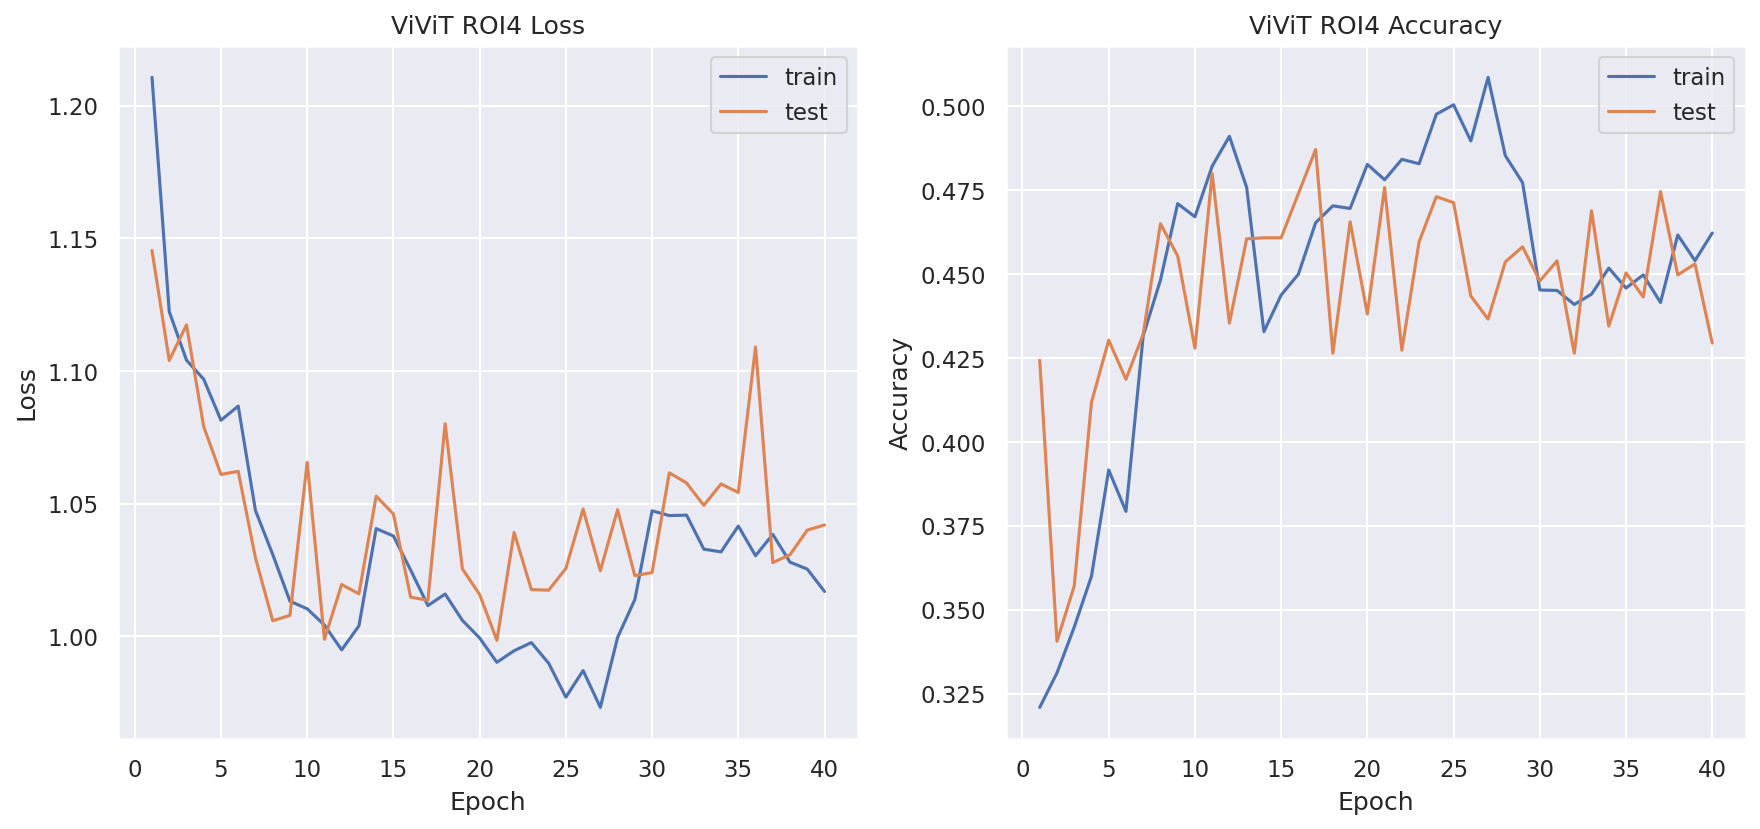

In [16]:
# visualize the training process
data = pd.read_csv(result_path+'/training_results.txt')
plot_training_path(data, 'ViViT ROI4')

**Metrics:**

In [17]:
checkpoint = torch.load(result_path+'/best_model.pth')
model = ViViT(num_heads=8, num_transformer_layers=8, 
              num_classes=3)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

predictions, y_test = eval_model(model, test_dataloader, device)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='macro'))
print('Recall:', recall_score(y_test, predictions, average='macro'))

Accuracy: 0.46488294314381273
Precision: 0.45790890756646635
Recall: 0.46002751977984174


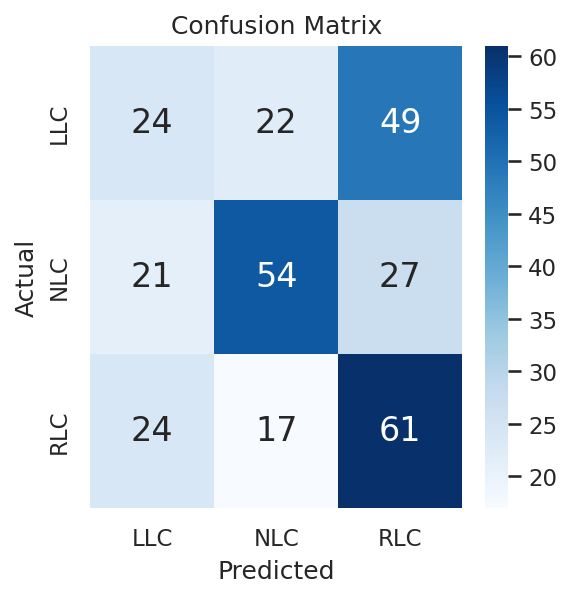

In [18]:
cm = confusion_matrix(y_test, predictions)  # compute confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.yticks([0.5,1.5,2.5], ['LLC', 'NLC', 'RLC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

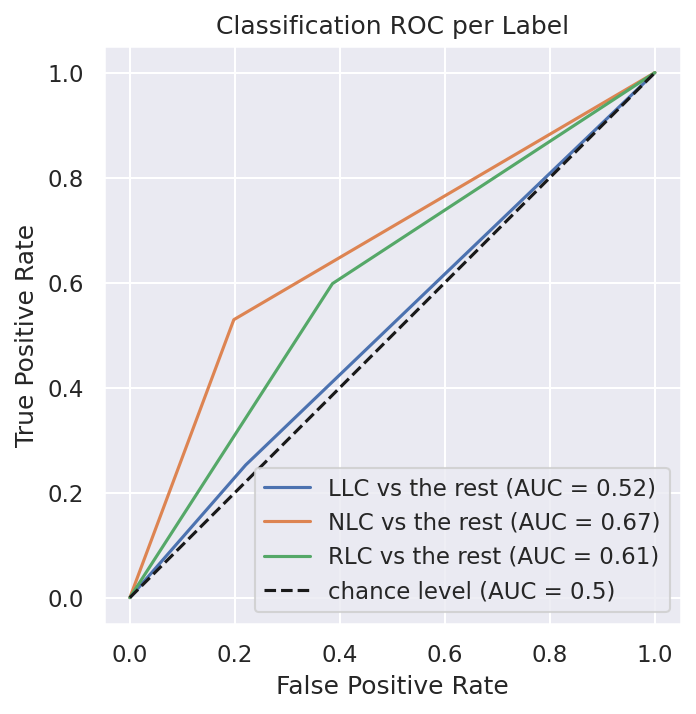

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))

label_set = {'LLC': 0, 'NLC': 1, 'RLC': 2}

for label in label_set:
    RocCurveDisplay.from_predictions(
        (np.array(y_test) == label_set[label]).astype(int),
        (np.array(predictions) == label_set[label]).astype(int),
        name = f"{label} vs the rest",
        ax=ax)


plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.axis('square')
plt.title("Classification ROC per Label")
plt.show()

# **Prediction**

These experiments were abandoned due to the underperformance in recognition.